## datafest january challenge.
    this challenge aims to determine the average order value(AOV) on 100 shopify shops selling one particular model of shoe.  

In [62]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [63]:
os.getcwd()  #this returns the current working directory.

'C:\\Users\\DELL'

In [64]:
os.listdir("Desktop\\datafest jan challenge")

['2019 Winter Data Science Intern Challenge Data Set cleaned.csv']

In [65]:
data_set = pd.read_csv("Desktop\\datafest jan challenge\\2019 Winter Data Science Intern Challenge Data Set cleaned.csv")
data_set.head(6)   #this gives us the first 6 records showing us what the dataset looks like.

,order_id,shop_id,user_id,order_amount,total_items,payment_method,Date,Time
0,637,90,700,178,1,credit_card,3/19/2017,11:26:29 PM
1,283,71,700,492,3,cash,3/26/2017,4:43:59 AM
2,2463,37,700,284,2,cash,3/27/2017,9:24:16 PM
3,1354,50,700,579,3,cash,3/7/2017,6:00:23 PM
4,2585,89,700,392,2,cash,3/21/2017,12:18:52 PM
5,2700,46,700,166,1,debit,3/18/2017,12:38:56 PM


In [66]:
del data_set['payment_method'], data_set["Date"], data_set['Time']  #removing some irrelevant variable on the dataset.
preprocessing.scale(data_set)  # removed the payment method since it's so relevant 
data_set.info()   # this shows the various types of variables and their type of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   order_id      4937 non-null   int64
 1   shop_id       4937 non-null   int64
 2   user_id       4937 non-null   int64
 3   order_amount  4937 non-null   int64
 4   total_items   4937 non-null   int64
dtypes: int64(5)
memory usage: 193.0 KB


In [67]:
#checking for relationship between the dataset

pd.crosstab(index = data_set["shop_id"], columns= data_set['total_items'])

total_items,1,2,3,4,5,6,8
shop_id,,,,,,,
1,12,23,8,1,0,0,0
2,25,17,10,2,1,0,0
3,15,20,8,5,0,0,0
4,15,21,14,1,0,0,0
5,16,17,7,4,1,0,0
...,...,...,...,...,...,...,...
96,17,15,15,2,2,0,0
97,18,16,11,2,1,0,0
98,26,19,9,4,0,0,0


In [68]:
#checking for the correlation between variables of the dataset
data_set.corr()


,order_id,shop_id,user_id,order_amount,total_items
order_id,1.000000,-0.007152,0.002477,-0.014707,-0.014121
shop_id,-0.007152,1.000000,0.004701,0.023804,-0.003390
user_id,0.002477,0.004701,1.000000,-0.034689,-0.021220
order_amount,-0.014707,0.023804,-0.034689,1.000000,0.921515
total_items,-0.014121,-0.003390,-0.021220,0.921515,1.000000


In [69]:
data_set

,order_id,shop_id,user_id,order_amount,total_items
0,637,90,700,178,1
1,283,71,700,492,3
2,2463,37,700,284,2
3,1354,50,700,579,3
4,2585,89,700,392,2
...,...,...,...,...,...
4932,2333,61,999,632,4
4933,3167,44,999,432,3
4934,2432,46,999,166,1
4935,3634,90,999,534,3


## some descriptive statistics

In [70]:
data_set.describe()  # this returns a statistics summarising each of the numeric columns.

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [71]:
data_set.mean()    #this returns a mean of each of columns

order_id        2499.551347
shop_id           49.846465
user_id          849.752279
order_amount     302.580514
total_items        1.994734
dtype: float64

In [72]:
data_set.median()  #this returns a median of each of columns

order_id        2497.0
shop_id           50.0
user_id          850.0
order_amount     284.0
total_items        2.0
dtype: float64

In [73]:
data_set.mode()

,order_id,shop_id,user_id,order_amount,total_items
0,1,53.0,718.0,153.0,2.0
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4932,4996,NaN,NaN,NaN,NaN
4933,4997,NaN,NaN,NaN,NaN
4934,4998,NaN,NaN,NaN,NaN
4935,4999,NaN,NaN,NaN,NaN


<AxesSubplot:>

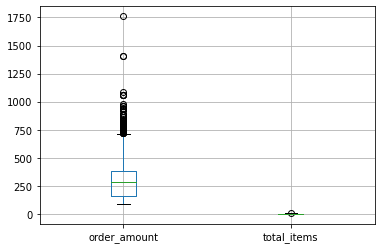

In [74]:
data_set.boxplot(column = ['order_amount', 'total_items']) #checking for outliers

In [78]:
data_set

,order_id,shop_id,user_id,order_amount,total_items
0,637,90,700,178,1
1,283,71,700,492,3
2,2463,37,700,284,2
3,1354,50,700,579,3
4,2585,89,700,392,2
...,...,...,...,...,...
4932,2333,61,999,632,4
4933,3167,44,999,432,3
4934,2432,46,999,166,1
4935,3634,90,999,534,3


In [82]:
data_set['Revenue'] = data_set['order_amount'] * data_set['total_items']   #adding a revenue column to the dataset. 
data_set['Revenue']
data_set

,order_id,shop_id,user_id,order_amount,total_items,Revenue
0,637,90,700,178,1,178
1,283,71,700,492,3,1476
2,2463,37,700,284,2,568
3,1354,50,700,579,3,1737
4,2585,89,700,392,2,784
...,...,...,...,...,...,...
4932,2333,61,999,632,4,2528
4933,3167,44,999,432,3,1296
4934,2432,46,999,166,1,166
4935,3634,90,999,534,3,1602


In [85]:
total_revenue = np.sum(data_set['Revenue'])
total_revenue

3698684

In [83]:
total_items = np.sum(data_set['total_items'])
total_items

9848

AOV = total_revenue / total_items 

In [87]:
AOV

375.5771730300569

# the average order value is 375 per item.

# what could have gone wrong was probable the use of the wrong metric.

# the write metric to be used is sales per order which is used to determine the AOV.